# Complex Sentiment Index :: tweet counts

In [5]:
coins = [
    'BTC',   # 1
    'ETH',   # 2
    'BNB',   # 3
    'DOT',   # 4
    'SOL',   # 5
    'LUNA',  # 6
    'ADA',   # 7
    'CRO',   # 8
    'AXS',   # 9
    'SAND',  # 10
    'DOGE',  # 11
    'SHIB',  # 12
    'MATIC', # 13
]

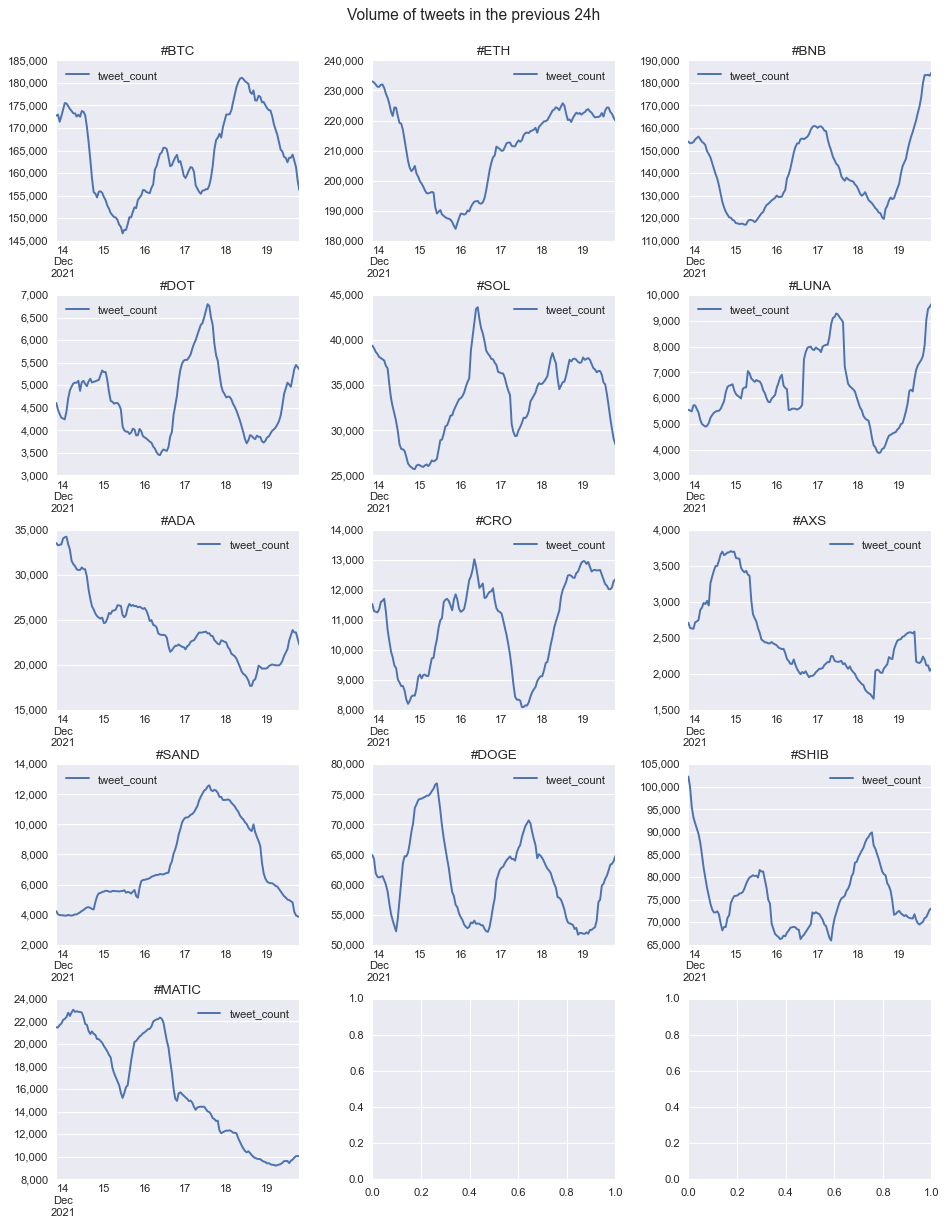

In [129]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

start_time = "2021-12-12T20-00-00Z"

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12, 15)

fig, axes = plt.subplots(nrows=5, ncols=3)

for k, coin in enumerate(coins):
    df = pd.read_csv(f"tweet-counts/{coin}-{start_time}.csv")
    
    df['start'] = pd.to_datetime(df['start'])
    df['end'] = pd.to_datetime(df['end'])
    df = df.set_index('end')
    
    i, j = int(k / 3), k % 3
    df['tweet_count'].rolling(window=24).sum().dropna().plot(
        legend='best', title=f"#{coin}", ax=axes[i, j])
    axes[i, j].axes.get_xaxis().set_label_text('')
    axes[i, j].get_yaxis().set_major_formatter(
       FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.subplots_adjust(wspace=.3, hspace=.3)
plt.suptitle("Volume of tweets in the previous 24h", fontsize=14, y=1.02)

plt.savefig(f"tweet-counts/{start_time}.png", facecolor=fig.get_facecolor(), transparent=False)
plt.show()